# Benchmarking on human lymph node samples

This notebook aims to reproduce the benchmarking results on human lymph node samples, including qualitative and quantitative results. The experimental results are avaible at https://drive.google.com/drive/u/0/folders/1HWdVjYvQ9jDQnjcheAMN6qndXiHRPnWs.

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = 'Dataset11_Lymph_Node_A1'
path = '../result/'  # please replace the path with download path.
adata = sc.read_h5ad(path + dataset + '/' + 'adata_all.h5ad')

In [3]:
# Dataset12_Lymph_Node_D1
list_Seurat = [4,0,5,1,2,3]
adata.obs['Seurat']  = pd.Categorical(adata.obs['Seurat'], 
                      categories=list_Seurat,
                      ordered=True)
list_totalVI = [4,6,2,1,5,3]
adata.obs['totalVI']  = pd.Categorical(adata.obs['totalVI'], 
                      categories=list_totalVI,
                      ordered=True)
list_MultiVI = ['1','2','4','0','3','5']
adata.obs['MultiVI']  = pd.Categorical(adata.obs['MultiVI'], 
                      categories=list_MultiVI,
                      ordered=True)
list_MOFA = [3,2,1,4,5,6]
adata.obs['MOFA']  = pd.Categorical(adata.obs['MOFA'], 
                      categories=list_MOFA,
                      ordered=True)
list_MEFISTO = [6,2,1,4,3,5]
adata.obs['MEFISTO']  = pd.Categorical(adata.obs['MEFISTO'], 
                      categories=list_MEFISTO,
                      ordered=True)
list_scMM = [2,3,1,6,4,5]
adata.obs['scMM']  = pd.Categorical(adata.obs['scMM'], 
                      categories=list_scMM,
                      ordered=True)
list_StabMap = ['2','0','4','1','3','5']
adata.obs['StabMap']  = pd.Categorical(adata.obs['StabMap'], 
                      categories=list_StabMap,
                      ordered=True)
list_SpatialGlue = [4,3,2,1,5,6]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)

/home/yahui/anaconda3/envs/STGAT/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yahui/anaconda3/envs/STGAT/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yahui/anaconda3/envs/STGAT/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yahui/anaconda3/envs/STGAT/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yahui/anaconda3/envs/STGAT/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided 

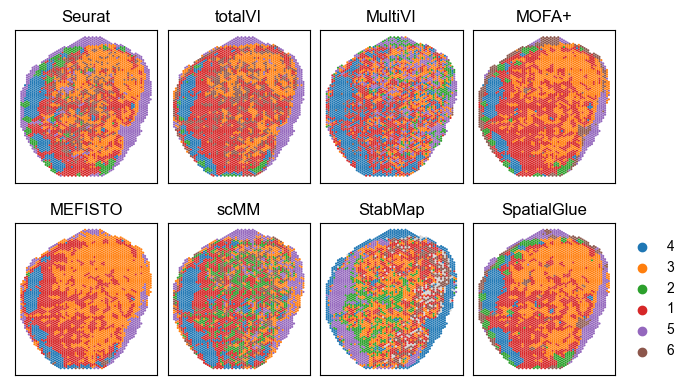

In [5]:
#plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
plt.rcParams['font.sans-serif'] = 'Arial'

fig, ax_list = plt.subplots(2,4, figsize=(7,4))  #(7, 4)
s_size = 10
sc.pl.embedding(adata, basis='spatial', color='Seurat', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='totalVI', ax=ax_list[0,1], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='MultiVI', ax=ax_list[0,2], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='MOFA', title='MOFA+', ax=ax_list[0,3], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='MEFISTO', ax=ax_list[1,0], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='scMM', ax=ax_list[1,1], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='StabMap', ax=ax_list[1,2], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', ax=ax_list[1,3], s=s_size,show=False)

# remove legend
ax_list[0,0].get_legend().remove()
ax_list[0,1].get_legend().remove()
ax_list[0,2].get_legend().remove()
ax_list[0,3].get_legend().remove()
ax_list[1,0].get_legend().remove()
ax_list[1,1].get_legend().remove()
ax_list[1,2].get_legend().remove()
#ax_list[1,3].get_legend().remove()

# remove x, y axis
ax_list[0, 0].set_xlabel('')
ax_list[0, 1].set_xlabel('')
ax_list[0, 2].set_xlabel('')
ax_list[0, 3].set_xlabel('')
ax_list[1, 0].set_xlabel('')
ax_list[1, 1].set_xlabel('')
ax_list[1, 2].set_xlabel('')
ax_list[1, 3].set_xlabel('')

ax_list[0, 0].set_ylabel('')
ax_list[0, 1].set_ylabel('')
ax_list[0, 2].set_ylabel('')
ax_list[0, 3].set_ylabel('')
ax_list[1, 0].set_ylabel('')
ax_list[1, 1].set_ylabel('')
ax_list[1, 2].set_ylabel('')
ax_list[1, 3].set_ylabel('')

plt.tight_layout(w_pad=0.4)
#plt.tight_layout(h_pad=0.1)
#plt.show()

#save figures
save_path = '../Figure/' 
#plt.savefig(save_path + 'benchmark_lymph_A1.pdf', bbox_inches='tight', dpi=300)

# Comparison of different methods with 6 supervised metrics 

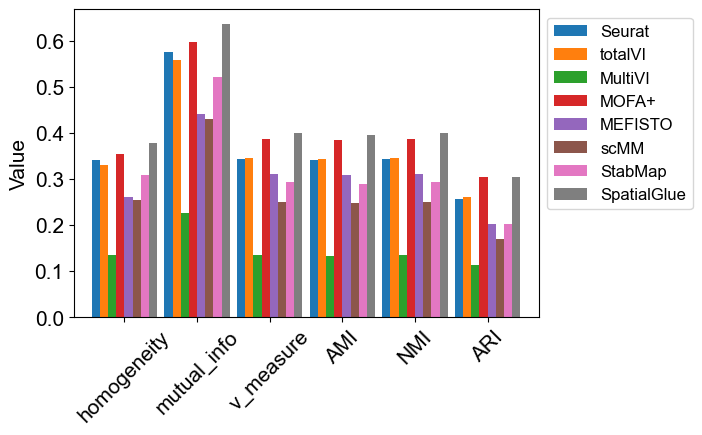

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 15

res = pd.read_csv('../result/Dataset11_Lymph_Node_A1/evaluation_single_resolution_A1.csv', index_col=0)
res.index = res.index.where(res.index != 'MOFA', 'MOFA+')

res.T.plot(kind='bar', width=0.9)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Value')

path = '../Figure/'
#plt.savefig(path +  'benchmark_lymph_A1.pdf', bbox_inches='tight', dpi=300)

## Testing the robustness of different methods against cluster number

To do that, we evaluate the performance of methods with cluster number ranging from 4 to 11.

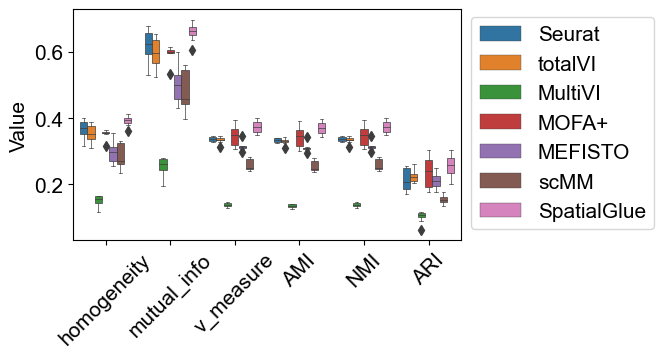

In [14]:
import pandas as pd
res_all = pd.read_csv('../result/Dataset11_Lymph_Node_A1/evaluation_multiple_resolution_A1.csv', index_col=0)
res_all.index = res_all.index.where(res_all.index != 'MOFA', 'MOFA+')
res_all_stack = res_all.stack().reset_index()
res_all_stack
res_all_stack.columns=['Method', 'Metric', 'value']
res_all_stack.set_index('Method')

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

ax = sns.boxplot(data=res_all_stack, x='Metric', y='value', hue='Method', linewidth=0.5)

plt.xticks(rotation=45)
#plt.yticks(size=50)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.set_title('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01))

path = '../Figure/'
#plt.savefig(path +  'benchmark_lymph_A1.pdf', bbox_inches='tight', dpi=300)